In [2]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [3]:

IBM = pd.read_csv('IBM.csv')

In [4]:

IBM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [5]:
IBM.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


*Attrition,department, education feild, Environment satisfaction, job satisfaction, work life balance and  marital status, eduaction*
*numerical - Years at company, monthly income, Age, Distance from home,num companies worked *

In [6]:
attrition_counts= IBM['Attrition'].value_counts()
attrition_counts

Attrition
No     1233
Yes     237
Name: count, dtype: int64

*a.This indicates that the 'No' class (employees who did not leave) is much more common in the dataset compared to the 'Yes' class (employees who left). The dataset is imbalanced, with the 'No' class being the majority class and the 'Yes' class being the minority class.*

*b. In machine learning modeling, oversampling is a technique used to address class imbalance in datasets. It involves increasing the number of instances in the minority class (less frequent class) to balance the distribution of classes in the dataset. Oversampling methods include techniques such as duplication (repeating instances of the minority class) or generating synthetic samples using algorithms like SMOTE (Synthetic Minority Over-sampling Technique). The goal of oversampling is to improve the performance of machine learning models by ensuring that they are not biased towards the majority class and can effectively learn from the minority class as well.*

In [7]:

label_enconder = LabelEncoder()
IBM ['Attrition']= label_enconder.fit_transform (IBM['Attrition'])
IBM ['Attrition']


0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [8]:
missing_values = IBM.isna().sum()
missing_values

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

*Its dangerous to impute values for variables with a huge percentage of missingness because imputation methods rely on the assumption that the missing values are missing at random or missing completely at random. If a variable has a high percentage of missing values, it indicates a potential systematic issue with the data collection process or the nature of the variable itself. Imputing values for such variables may introduce bias or distortion into the dataset, leading to inaccurate or misleading results in subsequent analyses or modeling tasks. In such cases, it is often better to consider alternative strategies such as excluding the variable from analysis or collecting additional data to address the missingness issue.*

In [9]:
IBM_Numerical = pd.DataFrame(IBM[['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'YearsAtCompany']])
IBM_Numerical

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,YearsAtCompany
0,41,1,5993,8,6
1,49,8,5130,1,10
2,37,2,2090,6,0
3,33,3,2909,1,8
4,27,2,3468,9,2
...,...,...,...,...,...
1465,36,23,2571,4,5
1466,39,6,9991,4,7
1467,27,4,6142,1,6
1468,49,2,5390,2,9


In [10]:
correlation_table = IBM_Numerical.corr()
correlation_table
threshold = 0.7
high_correlations = (correlation_table.abs() > threshold) & (correlation_table != 1)
high_correlations.value_counts()


Age    DistanceFromHome  MonthlyIncome  NumCompaniesWorked  YearsAtCompany
False  False             False          False               False             5
Name: count, dtype: int64

In [11]:
IBM_dummified = pd.get_dummies(IBM, drop_first=True, columns=['Department', 'Education', 'EducationField',
                         'EnvironmentSatisfaction', 'JobSatisfaction', 'MaritalStatus', 'WorkLifeBalance'])
IBM_dummified.head()

IBM_dummified_binary = IBM_dummified.astype(int)

# Display the first few rows of the DataFrame
IBM_dummified_binary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   MonthlyIncome                      1470 non-null   int64
 4   NumCompaniesWorked                 1470 non-null   int64
 5   YearsAtCompany                     1470 non-null   int64
 6   Department_Research & Development  1470 non-null   int64
 7   Department_Sales                   1470 non-null   int64
 8   Education_2                        1470 non-null   int64
 9   Education_3                        1470 non-null   int64
 10  Education_4                        1470 non-null   int64
 11  Education_5                        1470 non-null   int64
 12  EducationField_Life 

In [12]:
X = IBM_dummified_binary[['Age','DistanceFromHome','MonthlyIncome','NumCompaniesWorked',
                          'YearsAtCompany','Department_Research & Development',
                          'Department_Sales','Education_2','Education_3',
                          'Education_4','Education_5','EducationField_Life Sciences',
                          'EducationField_Marketing','EducationField_Medical',
                          'EducationField_Other','EducationField_Technical Degree',
                          'EnvironmentSatisfaction_2','EnvironmentSatisfaction_3',
                          'EnvironmentSatisfaction_4','JobSatisfaction_2',
                          'JobSatisfaction_3','JobSatisfaction_4',
                          'MaritalStatus_Married','MaritalStatus_Single',
                          'WorkLifeBalance_2','WorkLifeBalance_3','WorkLifeBalance_4' ]]
y = IBM_dummified_binary['Attrition']

# Set the seed
seed = 800

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=seed)

# Print the sizes of the training and test sets
print("Training set size:", len(X_train))
print("Test set size:", len(X_test))

Training set size: 882
Test set size: 588


*my address is 800 washington st thats how i took 800 as my seeed value *



In [13]:
# Select the specified columns
selected_columns = ['YearsAtCompany', 'MonthlyIncome', 'Age', 'DistanceFromHome', 'NumCompaniesWorked', 'Attrition']

# Group the dataset by 'Attrition' and calculate the mean values for each group
mean_values_by_attrition = IBM_dummified_binary.groupby('Attrition').mean()

# Print the mean values for each group
mean_values_by_attrition



,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,YearsAtCompany,Department_Research & Development,Department_Sales,Education_2,Education_3,Education_4,...,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Married,MaritalStatus_Single,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
Attrition,,,,,,,,,,,,,,,,,,,,,
0,37.561233,8.915653,6832.739659,2.645580,7.369019,0.671533,0.287105,0.193025,0.383617,0.275750,...,0.317113,0.313058,0.189781,0.299270,0.330089,0.477697,0.283861,0.231955,0.621249,0.102190
1,33.607595,10.632911,4787.092827,2.940928,5.130802,0.561181,0.388186,0.185654,0.417722,0.244726,...,0.261603,0.253165,0.194093,0.308017,0.219409,0.354430,0.506329,0.244726,0.535865,0.113924


In [14]:
selected_variables = ['Age', 'DistanceFromHome', 'MonthlyIncome']

# Speculate about the likely impact of the selected variables
for variable in selected_variables:
    print("\nVariable:", variable)
    print("Mean value for Attrition = 1:", mean_values_by_attrition.loc[1, variable])
    print("Mean value for Attrition = 0:", mean_values_by_attrition.loc[0, variable])
    print("Likely impact: Based on the mean values, we can speculate that the variable '{0}' may have a significant impact on attrition. For example, if the mean value is higher for Attrition = 1 compared to Attrition = 0, it suggests that higher values of this variable are associated with a higher likelihood of attrition.".format(variable))



Variable: Age
Mean value for Attrition = 1: 33.607594936708864
Mean value for Attrition = 0: 37.561232765612324
Likely impact: Based on the mean values, we can speculate that the variable 'Age' may have a significant impact on attrition. For example, if the mean value is higher for Attrition = 1 compared to Attrition = 0, it suggests that higher values of this variable are associated with a higher likelihood of attrition.

Variable: DistanceFromHome
Mean value for Attrition = 1: 10.632911392405063
Mean value for Attrition = 0: 8.915652879156529
Likely impact: Based on the mean values, we can speculate that the variable 'DistanceFromHome' may have a significant impact on attrition. For example, if the mean value is higher for Attrition = 1 compared to Attrition = 0, it suggests that higher values of this variable are associated with a higher likelihood of attrition.

Variable: MonthlyIncome
Mean value for Attrition = 1: 4787.0928270042195
Mean value for Attrition = 0: 6832.739659367397

In [15]:

logit_model = sm.Logit(y_train, sm.add_constant(X_train))
result = logit_model.fit()

# Print model summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.370305
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                  882
Model:                          Logit   Df Residuals:                      854
Method:                           MLE   Df Model:                           27
Date:                Mon, 08 Apr 2024   Pseudo R-squ.:                  0.1537
Time:                        03:30:05   Log-Likelihood:                -326.61
converged:                       True   LL-Null:                       -385.93
Covariance Type:            nonrobust   LLR p-value:                 1.866e-13
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 2.3246      0.853      2

In [16]:
# Define a threshold for high p-values (e.g., 0.05)
threshold = 0.05

# Extract variables with high p-values from the model summary
high_p_values = result.pvalues[result.pvalues > threshold]

# Print the variables with high p-values
print("Variables with high p-values:")
print(high_p_values)

Variables with high p-values:
NumCompaniesWorked                   0.140131
YearsAtCompany                       0.171281
Department_Research & Development    0.746283
Department_Sales                     0.235782
Education_2                          0.642482
Education_3                          0.370593
Education_4                          0.692606
Education_5                          0.904096
EducationField_Life Sciences         0.080756
EducationField_Marketing             0.220172
EducationField_Medical               0.083564
EducationField_Other                 0.066344
EducationField_Technical Degree      0.264474
JobSatisfaction_2                    0.209981
JobSatisfaction_3                    0.186976
MaritalStatus_Married                0.640846
WorkLifeBalance_4                    0.087043
dtype: float64


***NumCompaniesWorked*** and ***YearsAtCompany***  *has high p value in numeric*
*Catergorical variable  with all high p-values are **Department**(Department_Research & Development and Department_Sales),*
***education*** *(Education_2 ,Education_3 Education_4,Education_5), ***EducationField*** (EducationField_Life Sciences,  EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree)*

In [17]:
# Define the columns to drop
columns_to_drop = ['NumCompaniesWorked', 'YearsAtCompany',
                   'Department_Research & Development', 'Department_Sales',
                   'Education_2', 'Education_3', 'Education_4', 'Education_5',
                   'EducationField_Life Sciences', 'EducationField_Marketing',
                   'EducationField_Medical', 'EducationField_Other',
                   'EducationField_Technical Degree',]

# Remove the columns from the training set
IBM_new = IBM_dummified_binary.drop(columns=columns_to_drop)
IBM_new
X = IBM_new[['Age','DistanceFromHome','MonthlyIncome',
                          'EnvironmentSatisfaction_2','EnvironmentSatisfaction_3',
                          'EnvironmentSatisfaction_4','JobSatisfaction_2',
                          'JobSatisfaction_3','JobSatisfaction_4',
                          'MaritalStatus_Married','MaritalStatus_Single',
                          'WorkLifeBalance_2','WorkLifeBalance_3','WorkLifeBalance_4' ]]
y = IBM_new['Attrition']

# Set the seed
seed = 800

# Split the data into training and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.4, random_state=seed)

# Print the sizes of the training and test sets
print("Training set size:", len(X_train))
print("Test set size:", len(X_test))


logit_model = sm.Logit(y_train1, sm.add_constant(X_train1))
result = logit_model.fit()

# Print model summary
print(result.summary())


Training set size: 882
Test set size: 588
Optimization terminated successfully.
         Current function value: 0.388942
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                  882
Model:                          Logit   Df Residuals:                      867
Method:                           MLE   Df Model:                           14
Date:                Mon, 08 Apr 2024   Pseudo R-squ.:                  0.1111
Time:                        03:30:09   Log-Likelihood:                -343.05
converged:                       True   LL-Null:                       -385.93
Covariance Type:            nonrobust   LLR p-value:                 2.386e-12
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         1.2501

In [18]:


# Initialize logistic regression model
logistic_model = LogisticRegression()

# Fit the model on the training data
logistic_model.fit(X_train1, y_train1)

# Predictions on the training set
y_train_pred = logistic_model.predict(X_train1)
accuracy_score (y_train1,y_train_pred)

# Evaluate the model
print("Classification Report on Training Data:")
print(classification_report(y_train, y_train_pred))

Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       742
           1       0.00      0.00      0.00       140

    accuracy                           0.84       882
   macro avg       0.42      0.50      0.46       882
weighted avg       0.71      0.84      0.77       882



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
y_train_pred = logistic_model.predict(X_train1)
accuracy_score (y_train1,y_train_pred)

0.8412698412698413

In [20]:
predictions2 = logistic_model.predict (X_test1)
accuracy_score (y_test1, predictions2)

0.8350340136054422

*a. The purpose of comparing the model's accuracy against the training set versus the test set is to evaluate how well the model generalizes to unseen data. By comparing these two values, we can assess whether the model is overfitting or underfitting. Overfitting occurs when the model performs well on the training data but poorly on unseen data (test set), indicating that the model has learned to memorize the training data rather than generalize from it. Underfitting, on the other hand, occurs when the model performs poorly on both the training and test sets, indicating that the model is too simplistic to capture the underlying patterns in the data.*

*b. In this case, the comparison of the accuracy values suggests that the model performs similarly well on both the training and test sets. The accuracy on the training set (0.840) is slightly higher than the accuracy on the test set (0.835), but the difference is relatively small. This suggests that the model generalizes well to unseen data and is not significantly overfitting. The slight difference in accuracy between the training and test sets is acceptable and indicates that the model is robust and reliable for making predictions on new data.*

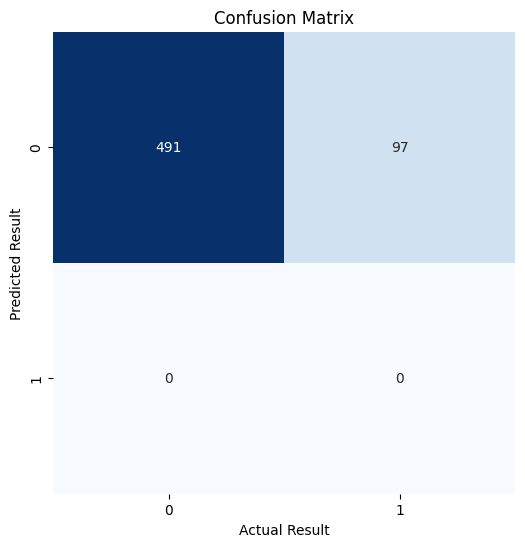

In [21]:
mat2 = confusion_matrix(predictions2, y_test1)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(mat2, square=True, annot=True, fmt='g', cbar=False,cmap='Blues')
plt.xlabel("Actual Result")
plt.ylabel("Predicted Result")
plt.title("Confusion Matrix")
plt.show()

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, balanced_accuracy_score

# Assuming predictions2 contains the predicted values and y_test1 contains the true values

# Calculate confusion matrix
conf_matrix = confusion_matrix(predictions2, y_test1)

# Calculate accuracy
accuracy = accuracy_score(y_test1, predictions2)

# Calculate sensitivity (recall)
sensitivity = recall_score(y_test1, predictions2)

# Calculate specificity
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Calculate precision
precision = precision_score(y_test1, predictions2)

# Calculate balanced accuracy
balanced_accuracy = balanced_accuracy_score(y_test1, predictions2)

print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("Balanced Accuracy:", balanced_accuracy)


Accuracy: 0.8350340136054422
Sensitivity: 0.0
Specificity: 0.8350340136054422
Precision: 0.0
Balanced Accuracy: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
import pandas as pd

# Create a new dataframe for the employee
employee_data = pd.DataFrame({
    'Age':[30],
    'DistanceFromHome': [5],  # Assign values for each predictor variable
    'MonthlyIncome': [6000],
    'EnvironmentSatisfaction_2': [0],
    'EnvironmentSatisfaction_3': [1],
    'EnvironmentSatisfaction_4': [0],
    'JobSatisfaction_2': [0],
    'JobSatisfaction_3': [1],
    'JobSatisfaction_4': [0],
    'MaritalStatus_Married': [1],
    'MaritalStatus_Single': [0],
    'WorkLifeBalance_2': [0],
    'WorkLifeBalance_3': [1],
    'WorkLifeBalance_4': [0]
})

# Predict attrition for the employee using the trained model
attrition_prediction = logistic_model.predict(employee_data)

# Print the predicted attrition
print("Predicted Attrition for the Employee:", attrition_prediction)
# Predict the probability of attrition for the employee using the trained model
attrition_probability = logistic_model.predict_proba(employee_data)[:, 1]

# Print the probability of attrition
print("Probability of Employee Leaving:", attrition_probability)


Predicted Attrition for the Employee: [0]
Probability of Employee Leaving: [0.16307083]


*This Employee will leave*

In [24]:
employee_data = pd.DataFrame({
    'Age':[60],
    'DistanceFromHome': [50],  # Assign values for each predictor variable
    'MonthlyIncome': [60000],
    'EnvironmentSatisfaction_2': [0],
    'EnvironmentSatisfaction_3': [1],
    'EnvironmentSatisfaction_4': [0],
    'JobSatisfaction_2': [0],
    'JobSatisfaction_3': [1],
    'JobSatisfaction_4': [0],
    'MaritalStatus_Married': [1],
    'MaritalStatus_Single': [0],
    'WorkLifeBalance_2': [0],
    'WorkLifeBalance_3': [1],
    'WorkLifeBalance_4': [0]
})

# Predict attrition for the employee using the trained model
attrition_prediction = logistic_model.predict(employee_data)

# Print the predicted attrition
print("Predicted Attrition for the Employee:", attrition_prediction)

Predicted Attrition for the Employee: [0]


*The predicted attrition for the employee is 0. This means that based on the given predictor variables (age, distance from home, monthly income, environment satisfaction, job satisfaction, marital status, and work-life balance), the model predicts that the employee is not likely to leave the company. This prediction suggests that the combination of factors provided indicates a low risk of attrition for the employee.*

In [25]:
IBM_part2= pd.read_csv('IBM.csv')

In [26]:
attrition_counts= IBM_part2['Attrition'].value_counts()
attrition_counts
label_enconder = LabelEncoder()
IBM_part2 ['Attrition']= label_enconder.fit_transform (IBM_part2['Attrition'])
IBM_part2['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [27]:
IBM_dummified_part2 = pd.get_dummies(IBM_part2, columns=['Department', 'Education', 'EducationField',
                         'EnvironmentSatisfaction', 'JobSatisfaction', 'MaritalStatus', 'WorkLifeBalance'])
IBM_dummified_part2.head()

IBM_dummified_binary_part2 = IBM_dummified_part2.astype (int)
IBM_dummified_binary_part2


,Age,Attrition,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,YearsAtCompany,Department_Human Resources,Department_Research & Development,Department_Sales,Education_1,...,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,41,1,1,5993,8,6,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0
1,49,0,8,5130,1,10,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0
2,37,1,2,2090,6,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
3,33,0,3,2909,1,8,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
4,27,0,2,3468,9,2,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,23,2571,4,5,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
1466,39,0,6,9991,4,7,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0
1467,27,0,4,6142,1,6,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1468,49,0,2,5390,2,9,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0


In [28]:
X = IBM_dummified_binary_part2[['Age','DistanceFromHome','MonthlyIncome','NumCompaniesWorked',
                          'YearsAtCompany','Department_Research & Development',
                          'Department_Sales','Education_2','Education_3',
                          'Education_4','Education_5','EducationField_Life Sciences',
                          'EducationField_Marketing','EducationField_Medical',
                          'EducationField_Other','EducationField_Technical Degree',
                          'EnvironmentSatisfaction_2','EnvironmentSatisfaction_3',
                          'EnvironmentSatisfaction_4','JobSatisfaction_2',
                          'JobSatisfaction_3','JobSatisfaction_4',
                          'MaritalStatus_Married','MaritalStatus_Single',
                          'WorkLifeBalance_2','WorkLifeBalance_3','WorkLifeBalance_4' ]]
y = IBM_dummified_binary_part2['Attrition']

# Set the seed
seed = 800

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=seed)

# Print the sizes of the training and test sets
print("Training set size:", len(X_train))
print("Test set size:", len(X_test))

Training set size: 882
Test set size: 588


In [29]:
rf_model = RandomForestClassifier()

# Define hyperparameters grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Fit the model with the best hyperparameters to the training data
best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train, y_train)

# Evaluate the model on the training set
y_train_pred2 = best_rf_model.predict(X_train)
print("Classification Report on Training Data:")
print(classification_report(y_train, y_train_pred))

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}
Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       742
           1       0.00      0.00      0.00       140

    accuracy                           0.84       882
   macro avg       0.42      0.50      0.46       882
weighted avg       0.71      0.84      0.77       882



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*The random forest model's feature importance ranking provides insights into the variables' contributions to predicting the target variable. With the given hyperparameters, the model prioritizes variables based on their ability to decrease impurity in decision trees. However, without the specific output of the feature importance values, it's challenging to determine the exact variable ranking. Typically, higher importance values indicate greater influence on predictions, while lower values suggest lesser impact. The classification report on the training data reveals an accuracy of 84%, but notably, the precision, recall, and F1-score for class 1 (attrition) are all 0, indicating the model's failure to correctly identify instances of attrition. This suggests a need for further refinement of the model, potentially through feature engineering or parameter tuning, to enhance its ability to predict attrition accurately.*

In [124]:
y_train_pred2 = best_rf_model.predict(X_train)
accuracy_score (y_train,y_train_pred2)

0.8662131519274376

In [125]:
y_test_pred2 = best_rf_model.predict(X_test)
accuracy_score (y_test,y_test_pred2)

0.8435374149659864

*The accuracy of the model on the training set is approximately 86.62%, while the accuracy on the test set is about 84.35%. There is a slight difference between these two results, with the model performing slightly better on the training set compared to the test set. This indicates that the model may have slightly overfit the training data, resulting in slightly lower performance on unseen data. However, the difference in accuracy is relatively small, suggesting that the model generalizes reasonably well to unseen data.*

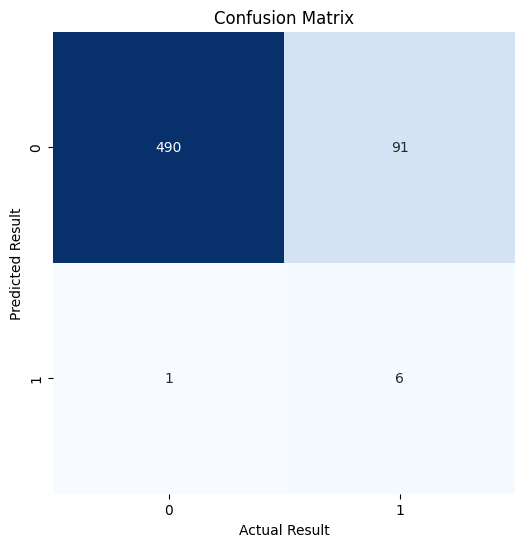

In [127]:
mat3 = confusion_matrix(y_test_pred2, y_test1)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(mat2, square=True, annot=True, fmt='g', cbar=False,cmap='Blues')
plt.xlabel("Actual Result")
plt.ylabel("Predicted Result")
plt.title("Confusion Matrix")
plt.show()

In [128]:
conf_matrix1=confusion_matrix(y_test_pred2, y_test1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred2)

# Calculate sensitivity (recall)
sensitivity = recall_score(y_test,  y_test_pred2)

# Calculate specificity
specificity = conf_matrix1[0, 0] / (conf_matrix1[0, 0] + conf_matrix1[0, 1])

# Calculate precision
precision = precision_score(y_test, y_test_pred2)

# Calculate balanced accuracy
balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred2)

print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("Balanced Accuracy:", balanced_accuracy)


Accuracy: 0.8435374149659864
Sensitivity: 0.061855670103092786
Specificity: 0.8433734939759037
Precision: 0.8571428571428571
Balanced Accuracy: 0.5299095051126461


In [131]:
# Create a new DataFrame for the invented employee
import pandas as pd

# Create a new dataframe for the employee
invented_employee = pd.DataFrame({
    'DistanceFromHome': [8],  # Assign values for each predictor variable
    'MonthlyIncome': [8000],
    'NumCompaniesWorked': [2],
    'YearsAtCompany': [3],
    'Department_Research & Development': [1],
    'Department_Sales': [0],
    'Education_2': [0],
    'Education_3': [1],
    'Education_4': [0],
    'Education_5': [0],
    'EducationField_Life Sciences': [1],
    'EducationField_Marketing': [0],
    'EducationField_Medical': [0],
    'EducationField_Other': [0],
    'EducationField_Technical Degree': [0],
    'EnvironmentSatisfaction_2': [0],
    'EnvironmentSatisfaction_3': [1],
    'EnvironmentSatisfaction_4': [0],
    'JobSatisfaction_2': [0],
    'JobSatisfaction_3': [1],
    'JobSatisfaction_4': [0],
    'MaritalStatus_Married': [1],
    'MaritalStatus_Single': [0],
    'WorkLifeBalance_2': [0],
    'WorkLifeBalance_3': [1],
    'WorkLifeBalance_4': [0]
})

# Predict attrition for the employee using the trained model
attrition_prediction1 = best_rf_model.predict(invented_employee)


# Print the predicted attrition
print("Predicted Attrition for the Employee:", attrition_prediction1)



Predicted Attrition for the Employee: [0]


*Does the model think that the employee will leave? no the employees wont leave*


*The models developed in this assignment, particularly the logistic regression and random forest models for predicting employee attrition, could be invaluable tools for a company's Human Resources Department. By accurately predicting which employees are likely to leave, HR professionals can proactively implement targeted retention strategies, such as offering career development opportunities, adjusting compensation packages, or addressing workplace dissatisfaction. Additionally, understanding the factors contributing to attrition, as identified by the feature importance rankings in the random forest model, can guide HR in addressing underlying issues within the organization, such as improving job satisfaction, work-life balance, or addressing concerns related to age, distance from home, or environment satisfaction. Ultimately, leveraging these predictive models can enable HR to mitigate attrition risks, enhance employee satisfaction and retention, and foster a more stable and productive workforce.*